In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [6]:
#loading the csv to pandas dataframe
Heart_data=pd.read_csv('/content/Cardiovascular_Disease_Dataset.csv')

In [7]:
#check missing value
Heart_data.isnull().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [8]:
#Statisitical measures about the data
Heart_data.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [9]:
#checking the distribution of target variable
Heart_data['target'].value_counts()

,count
target,
1,580
0,420


In [10]:
# Define features and target
X=Heart_data.drop(columns=['target', 'patientid'],axis=1)
Y=Heart_data['target']

In [11]:
#spliting test and train datA
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [12]:
# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [13]:
# Make predictions
Y_pred = clf.predict(X_test)

In [14]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        84
           1       0.98      0.99      0.99       116

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



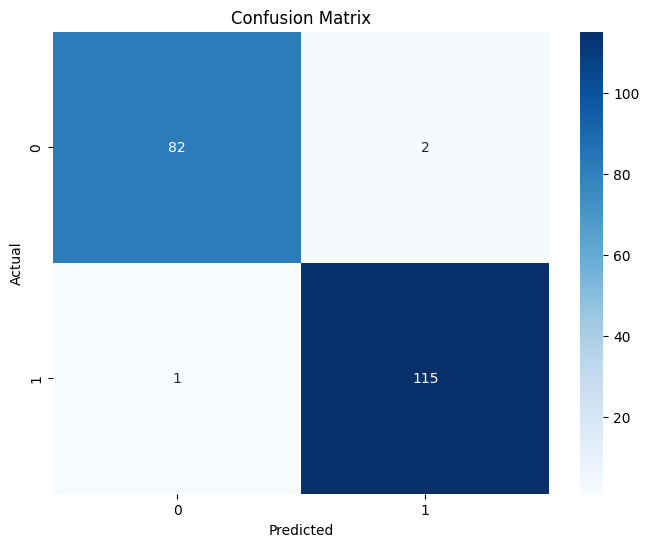

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import numpy as np

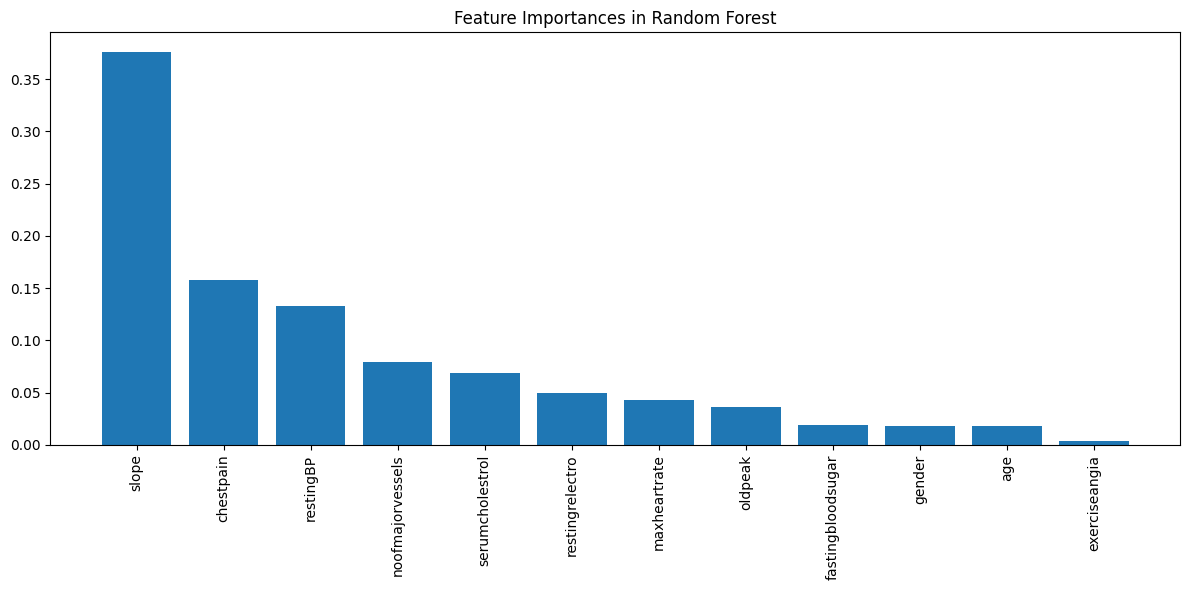

In [ ]:
# Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

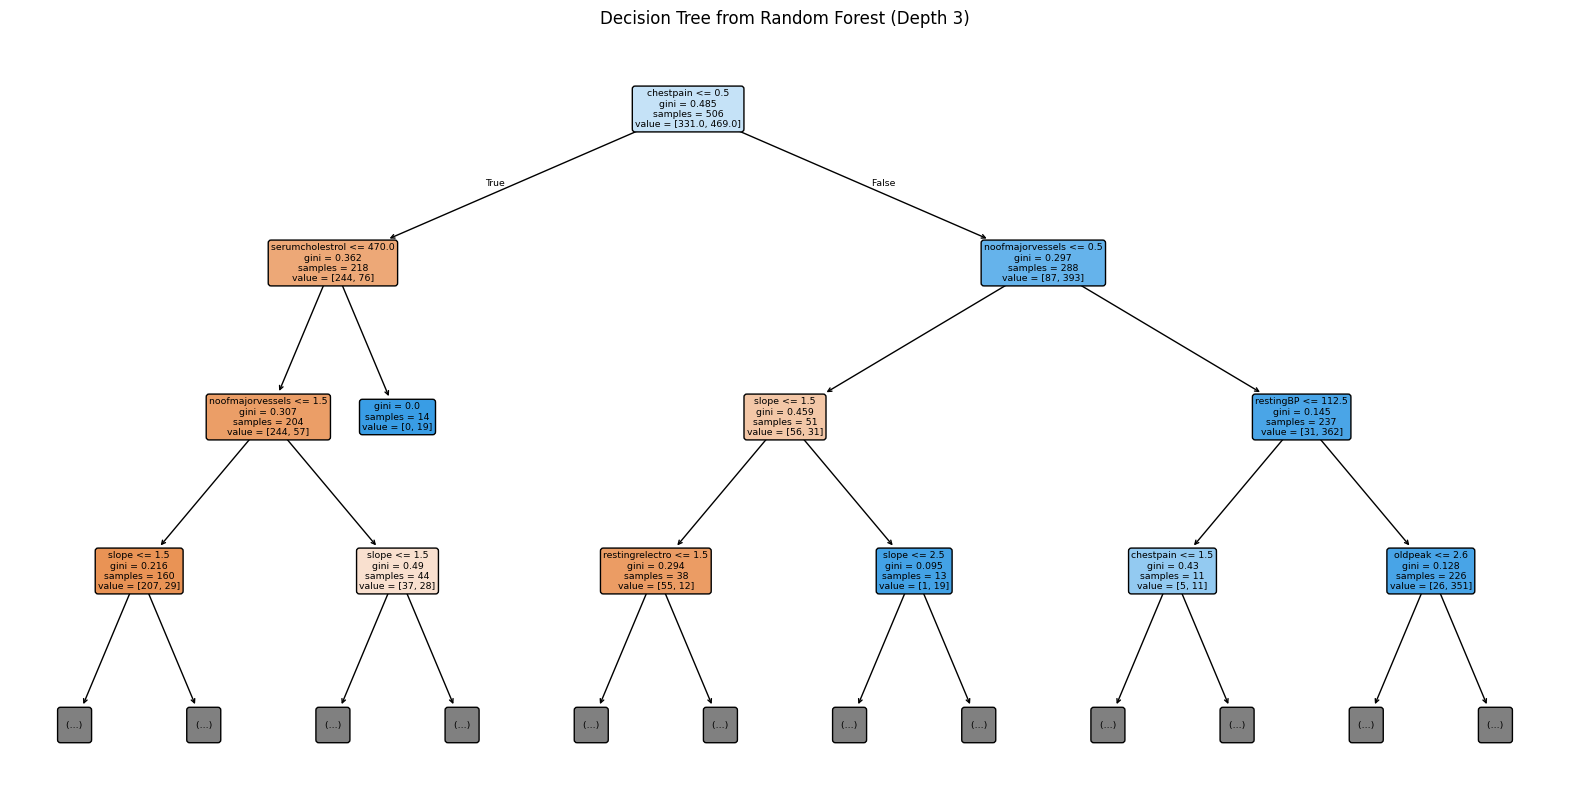

In [ ]:
# Visualize One Decision Tree from the Random Forest
plt.figure(figsize=(20,10))
tree.plot_tree(clf.estimators_[0], feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree from Random Forest (Depth 3)")
plt.show()

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

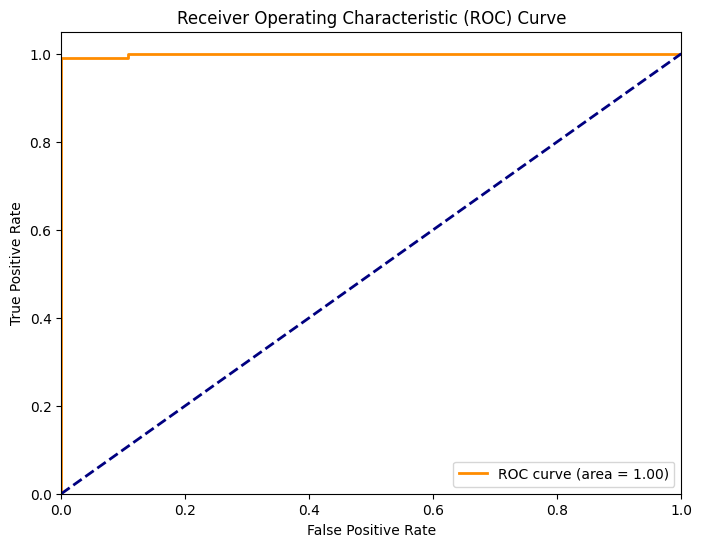

In [21]:
# --- ROC Curve Visualization ---
# Compute predicted probabilities for the positive class
Y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = roc_auc_score(Y_test, Y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()